In [1]:
using BenchmarkTools
using PyPlot
using Distributions

In [2]:
using SuyamaBayes

┌ Info: Precompiling SuyamaBayes [592efa15-fe82-42c5-96b5-6340eab1e32d]
└ @ Base loading.jl:1278


In [32]:
a = 1.
b = 0.01
N = 200
true_λ = [100., 50., 15.]
true_p = [0.5, 0.2, 0.3]
true_model, toy_data = generate_toy_data(N)
prior, model = init_model(a = a, b = b)

(PriorParameters([1.0, 1.0, 1.0], [0.01, 0.01, 0.01], [33.05868804417973, 30.029796741678805, 98.42774260957734]), MixtureModel{Poisson}(K = 3)
components[1] (prior = 0.1945): Poisson{Float64}(λ=33.933828263675764)
components[2] (prior = 0.2050): Poisson{Float64}(λ=89.31938612114317)
components[3] (prior = 0.6005): Poisson{Float64}(λ=312.1076391338637)
)

In [33]:
vi!(prior, toy_data, maxiter=100)

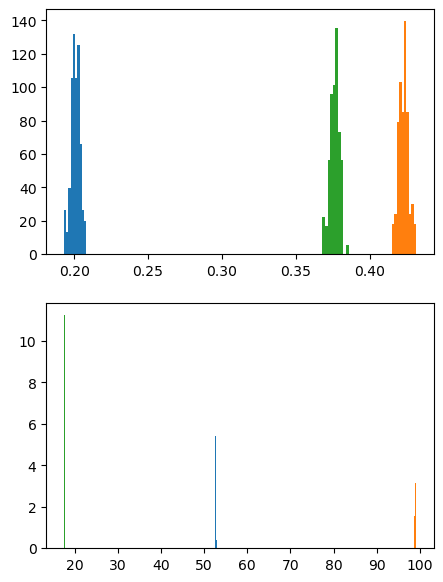

In [34]:
fig, ax = plt.subplots(2, 1, figsize=(5, 7))

alpha = rand(Dirichlet(prior.α), 100)
lambda = [rand(Gamma(prior.a[k], 1/prior.b[k]), 50) for k = 1:3]
for k = 1:3
    ax[1].hist(alpha[k, :], density=1)
    ax[2].hist(lambda[k], density=1)
end